# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

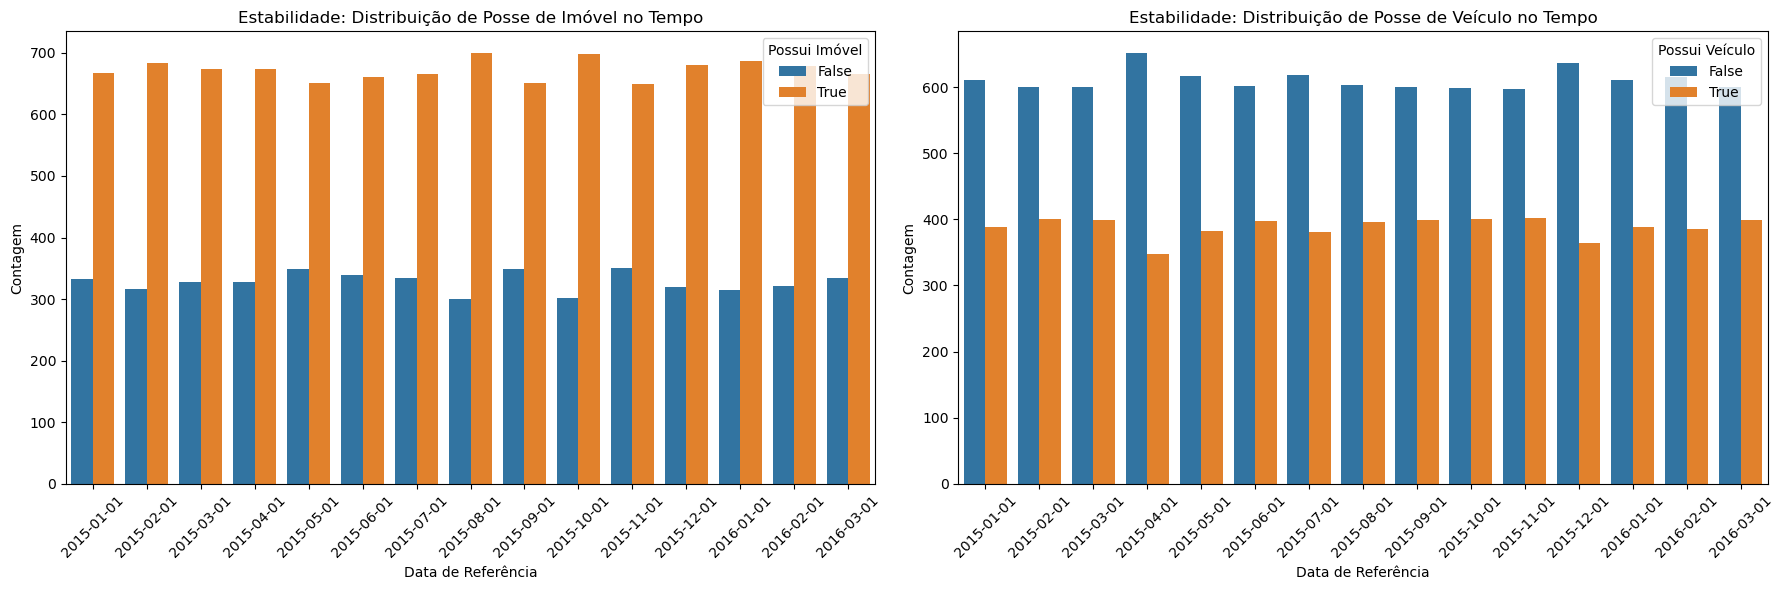

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Caminho do arquivo 
caminho_completo = r"C:\Users\NOTE\Downloads\Profissão Cientista de Dados M10 A1.csv.csv"
df = pd.read_csv(caminho_completo)

# Converte a coluna de data para o formato datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Cria a figura com dois subplots para os gráficos de barras
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Estabilidade da Distribuição de Posse de Imóvel no Tempo
sns.countplot(x='data_ref', hue='posse_de_imovel', data=df, ax=axes[0])
axes[0].set_title('Estabilidade: Distribuição de Posse de Imóvel no Tempo')
axes[0].set_xlabel('Data de Referência')
axes[0].set_ylabel('Contagem')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Possui Imóvel')

# Gráfico 2: Estabilidade da Distribuição de Posse de Veículo no Tempo
sns.countplot(x='data_ref', hue='posse_de_veiculo', data=df, ax=axes[1])
axes[1].set_title('Estabilidade: Distribuição de Posse de Veículo no Tempo')
axes[1].set_xlabel('Data de Referência')
axes[1].set_ylabel('Contagem')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Possui Veículo')

plt.tight_layout()
plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

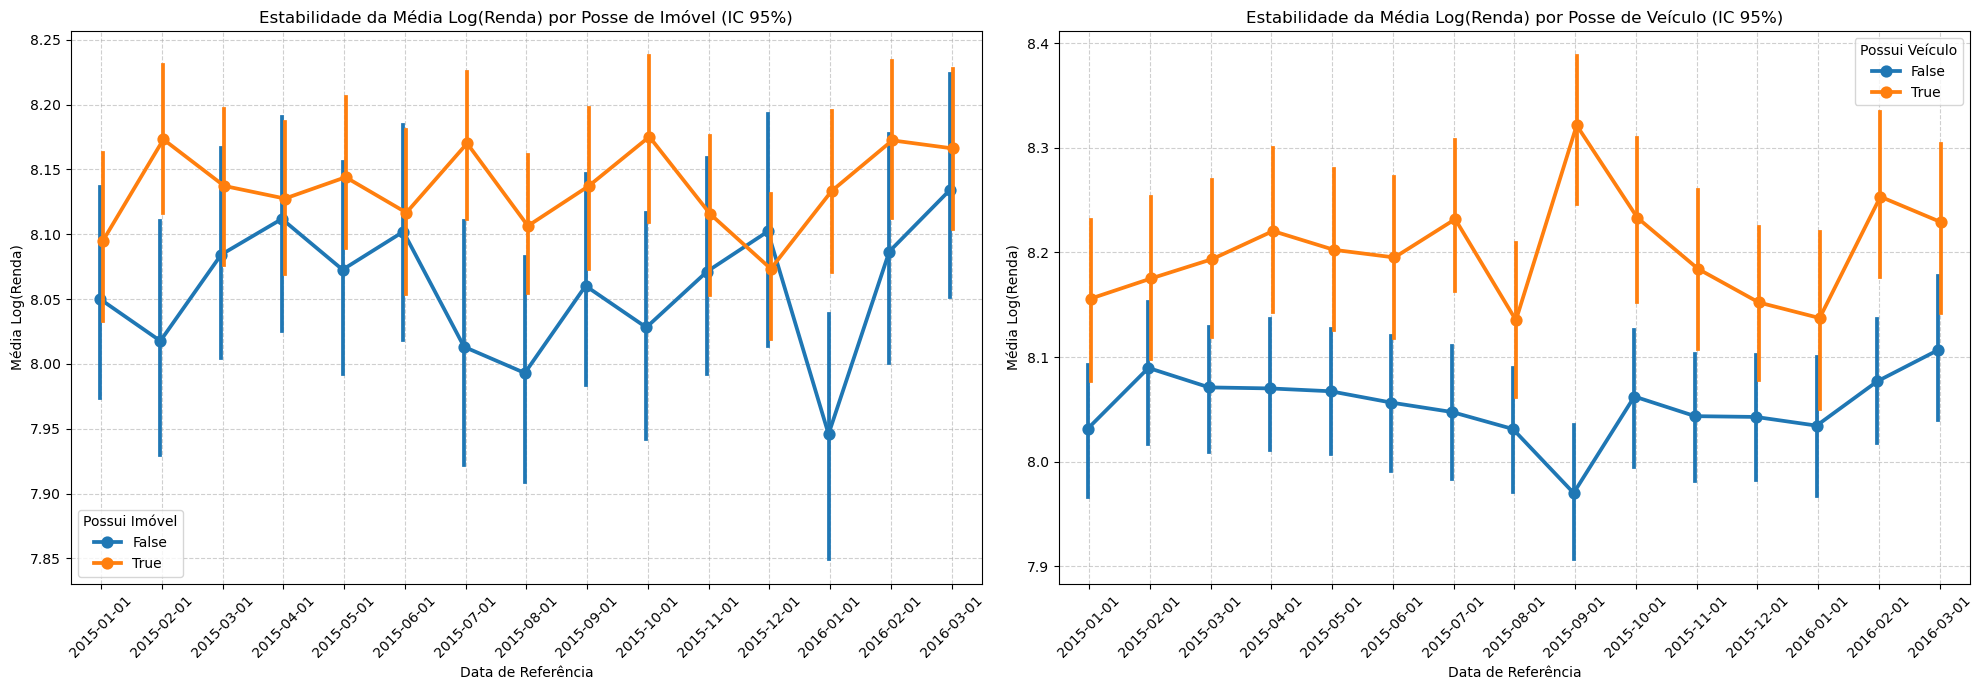

In [4]:
caminho_completo = r"C:\Users\NOTE\Downloads\Profissão Cientista de Dados M10 A1.csv.csv"
df = pd.read_csv(caminho_completo)

# Pré-processamento: Conversão de data e transformação Logarítmica da Renda
df['data_ref'] = pd.to_datetime(df['data_ref'])
df_clean = df.dropna(subset=['renda']).copy()
df_clean = df_clean[df_clean['renda'] > 0].copy()
df_clean['log_renda'] = np.log(df_clean['renda'])

# Cria a figura com dois subplots (Pointplots com IC 95%)
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Gráfico 1: Estabilidade da Média Log(Renda) por Posse de Imóvel (CORRIGIDO)
sns.pointplot(x='data_ref', y='log_renda', hue='posse_de_imovel', 
              data=df_clean, errorbar=('ci', 95), dodge=True, ax=axes[0])
axes[0].set_title('Estabilidade da Média Log(Renda) por Posse de Imóvel (IC 95%)')
axes[0].set_xlabel('Data de Referência')
axes[0].set_ylabel('Média Log(Renda)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Possui Imóvel')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Gráfico 2: Estabilidade da Média Log(Renda) por Posse de Veículo (CORRIGIDO)
sns.pointplot(x='data_ref', y='log_renda', hue='posse_de_veiculo', 
              data=df_clean, errorbar=('ci', 95), dodge=True, ax=axes[1])
axes[1].set_title('Estabilidade da Média Log(Renda) por Posse de Veículo (IC 95%)')
axes[1].set_xlabel('Data de Referência')
axes[1].set_ylabel('Média Log(Renda)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Possui Veículo')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Não houve alteração estatisticamente significativa na estabilidade das médias de Log(\text{Renda} para nenhum dos grupos (posse_de_imovel e posse_de_veiculo) ao longo do tempo (data_ref).Evidência: Os gráficos de ponto (pointplot) mostram que os Intervalos de Confiança de 95% (ICs) de um mesmo grupo (ex: quem possui veículo) se sobrepõem amplamente de um mês para o outro. Isso indica que a diferença observada na média mensal é apenas ruído amostral e não uma mudança real no comportamento da população (Concept Drift).